<a href="https://colab.research.google.com/github/USIS031120/Programacion-III/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
datos_entrenamiento, datos_prueba = dataset["train"], dataset["test"]

In [5]:
accesorios = ["Camiseta/top", "Pantalon", "Sueter", "Vestido", "Abrigo", "Sandalia", "Camisa", "Zapatilla", "Bolso", "Bota"]

In [6]:
numeros_ejemplo_entenamiento = metadata.splits["train"].num_examples
numeros_ejemplo_prueba = metadata.splits["test"].num_examples

print( numeros_ejemplo_entenamiento, numeros_ejemplo_prueba )

60000 10000


In [7]:
def normalizacion(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

In [8]:
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

In [9]:
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [10]:
modelo.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [11]:
batchsize = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(numeros_ejemplo_entenamiento).batch(batchsize)
datos_prueba = datos_prueba.batch(batchsize)

In [199]:
modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(numeros_ejemplo_entenamiento / batchsize))

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.0970 - accuracy: 0.9635
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0944 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0972 - accuracy: 0.9622
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0982 - accuracy: 0.9632
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0909 - accuracy: 0.9647


In [200]:
test_loss, test_accuracy = modelo.evaluate(datos_prueba, steps=math.ceil(numeros_ejemplo_prueba/batchsize))
print(test_loss*100, test_accuracy*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.6635 - accuracy: 0.8794
66.34644269943237 87.94000148773193


In [170]:
def graficar_images(i, predictions_array, true_labels, images):
  predictions_array, true_labels, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label==true_labels:
    color = "green"
  else:
    color = "red"
  plt.xlabel("Prediccion: {}".format(accesorios[predicted_label]), color=color)

In [171]:
for imagenes_prueba, etiquetas_prueba in datos_prueba.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

In [172]:
def graficar_valores_matrices(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color="#000000")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("green")

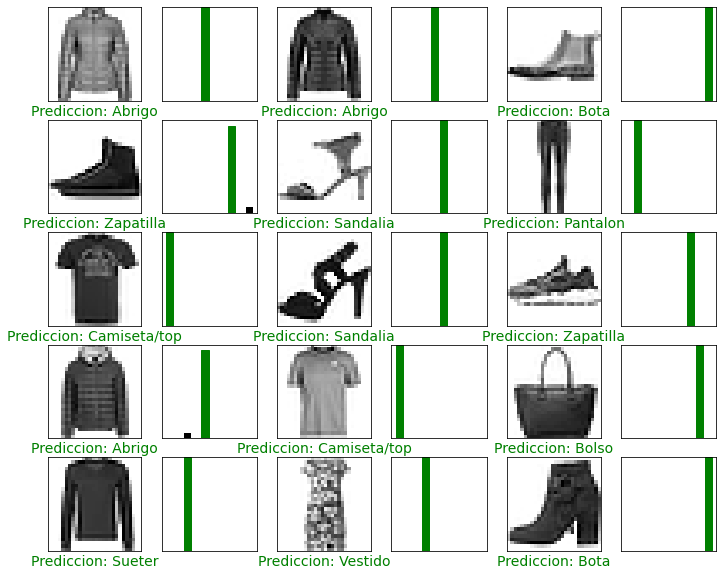

In [194]:
numfilas = 5
numcols = 3
numimages = numfilas*numcols

plt.figure(figsize=(2*2*numcols, 2*numfilas))
for i in range(numimages):
  plt.subplot(numfilas, 2*numcols, 2*i+1)
  graficar_images(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(numfilas, 2*numcols, 2*i+2)
  graficar_valores_matrices(i, predicciones, etiquetas_prueba)

plt.show()

In [241]:
import cv2
imgLocal = cv2.imread("/content/abrigo.png", 0)
imgLocal = tf.cast(imgLocal, tf.float32)
imgLocal /= 255
imgLocal = np.expand_dims(imgLocal, axis=0)
print(imgLocal.shape)

(1, 28, 28)


In [242]:
prediccionLocal = modelo.predict(imgLocal, batch_size=1)
tagLocal = np.argmax(prediccionLocal)
print(prediccionLocal)

[[6.5853455e-05 1.3529619e-10 2.0850955e-02 2.4122458e-03 9.4094610e-01
  1.5997976e-11 3.0678682e-02 7.5493646e-11 5.0461413e-03 1.9180333e-11]]


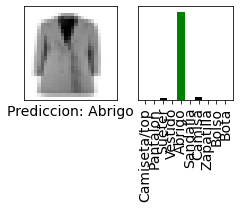

In [244]:
columnas = 2
filas = 2

plt.figure(figsize=(2*2*numcols, 2*numfilas))
plt.subplot(numfilas, 2*numcols, 2*i+1)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(imgLocal[0,...], cmap=plt.cm.binary)
plt.xlabel("Prediccion: {}".format(accesorios[tagLocal]), color="black")

plt.subplot(numfilas, 2*numcols, 2*i+2)

plt.grid(False)
plt.xticks([])
plt.yticks([])
thisplot = plt.bar(range(10),prediccionLocal[0], color="#000000")
plt.ylim([0,1])
thisplot[tagLocal].set_color("red")
thisplot[tagLocal].set_color("green")

plt.xticks(range(10), accesorios, rotation=90)

plt.rcParams['font.size'] = 14

plt.show()